In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [8]:
# Path to the combined data csv 
PATH_CSV = '/Users/Eric/Documents/Uni/Msc/Courses/Sem1/CI/LAB/covid/Coswara-Data/combined_data.csv'

# path to metadata
PATH_METADATA = '/Users/Eric/Documents/Uni/Msc/Courses/Sem1/CI/LAB/covid/Coswara-Data/csv_labels_legend.json'

#reading into a dataframe 
df = pd.read_csv(PATH_CSV)

# reading the json data 
with open (PATH_METADATA) as f:
    meta_data = json.load(f)

In [29]:
df_small = df.copy()
# columns we are interested in, the rest are not complete
# ID, Age, Covid_status, gender (g), country (l_c)
cols = ['id','a','covid_status','g','l_c',]
df_small = df_small[cols]
df_small.head()
df_small.shape

(2233, 5)

In [30]:
# remapping the covid_status to have healthy or not healthy 
ncov_status = {"healthy":"Negative",
               "no_resp_illness_exposed":"Negative",
               "recovered_full":"Negative",
               "resp_illness_not_identified":"Unknown",
               "positive_moderate":"Positive",
               "positive_mild":"Positive",
               "positive_asymp":"Positive"}

df_small.covid_status = df_small.covid_status.map(ncov_status)

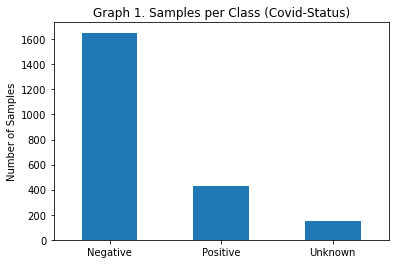

In [49]:
# let's look at the Distribution of the covid samples 
df_small.covid_status.value_counts().plot(kind='bar',
                                          title='Graph 1. Samples per Class (Covid-Status)',
                                          ylabel='Number of Samples',
                                          rot=0);
plt.savefig('./imgs/Graph1_samples_per_class.png')
plt.show()

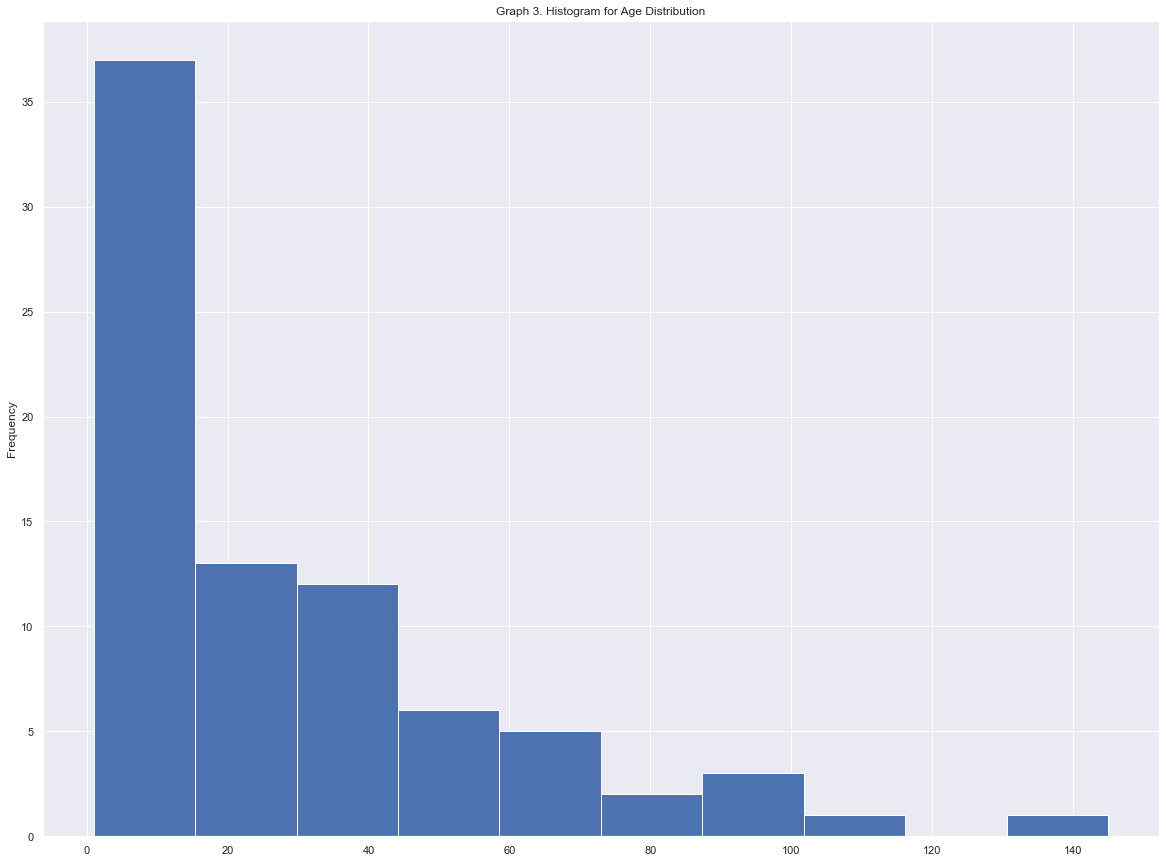

In [76]:
# let's look at the ages 
df_small.a.value_counts().plot(kind='hist',
                                          title='Graph 3. Histogram for Age Distribution',
                                          rot=0);
plt.savefig('./imgs/Graph3_age_distribution.png')
plt.show()

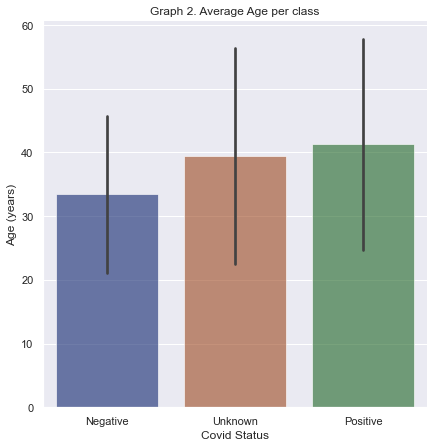

In [79]:
g = sns.catplot(
    data=df_small, kind="bar",
    x="covid_status", y="a",
    ci="sd", palette="dark", alpha=.6, height=6)
g.set_axis_labels("Covid Status", "Age (years)")
plt.title("Graph 2. Average Age per class")
#plt.savefig('./imgs/Graph2_average_age_per_class.png')
plt.show()

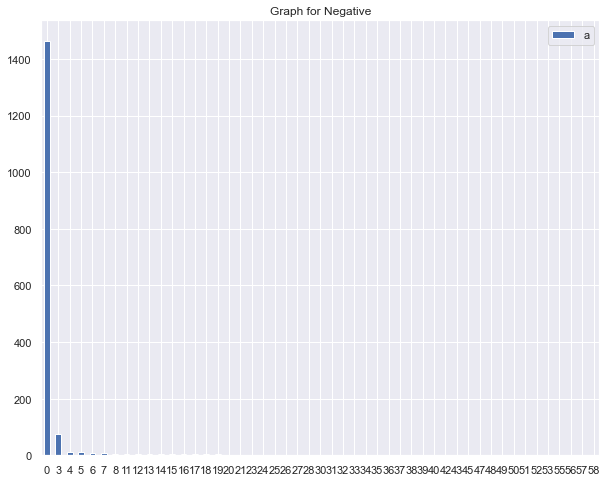

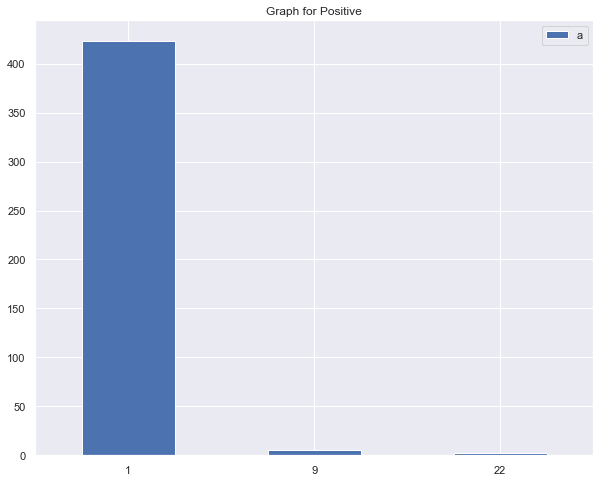

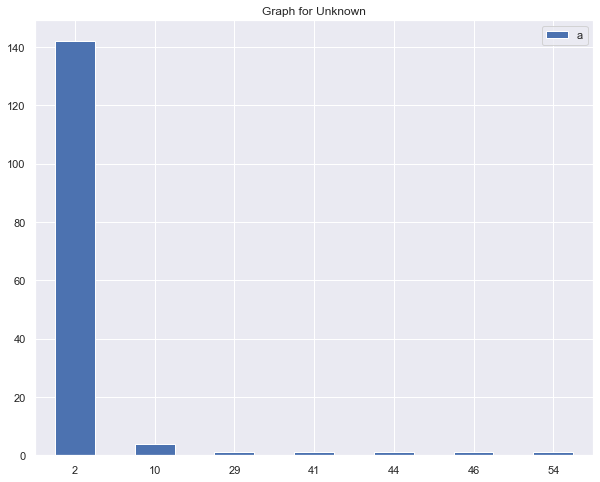

In [110]:
SIZE = (10,8)
sns.set(rc={'figure.figsize':SIZE})
# looking at the count per country 
kk = df_small.copy().groupby(['l_c','covid_status']).count().sort_values('a',ascending=False)['a'].reset_index()
# positive ones 
stats_uniq = list(kk.covid_status.unique())
for status in stats_uniq:
    kk[kk['covid_status'] == status].plot(kind='bar',rot=0,title=f'Graph for {status}');
    plt.show()

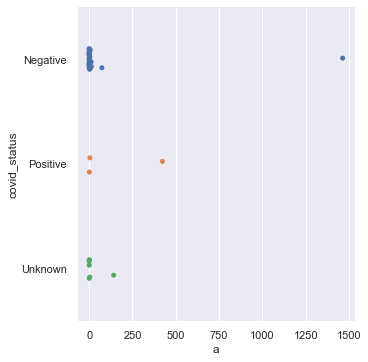

In [112]:
kk.head()
sns.catplot(data=kk,x='a',y='covid_status')

In [113]:
df_small.head()

,id,a,covid_status,g,l_c
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,Negative,male,India
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,Negative,male,India
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,Negative,female,United States
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,Negative,male,India
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,Negative,male,India


In [130]:
# lets look at the folder with extracted data
import glob, os
PATH_DATA = '/Users/Eric/Documents/Uni/Msc/Courses/Sem1/CI/LAB/covid/Coswara-Data/Extracted_data'
all_wav_files = glob.glob(PATH_DATA+'/*/*/*.wav')


cnt=0
unique_fnames = dict()
u_fname = {'breathing-deep.wav',
 'breathing-shallow.wav',
 'cough-heavy.wav',
 'cough-shallow.wav',
 'counting-fast.wav',
 'counting-normal.wav',
 'vowel-a.wav',
 'vowel-e.wav',
 'vowel-o.wav'}
for files in all_wav_files:
    fname = files.split('/')[-1]
    #unique_fnames.add(fname)
    if fname in u_fname: 
        cnt+=1
        unique_fnames[fname] = cnt

In [137]:
pd.DataFrame_from_keys(unique_fnames)

AttributeError: module 'pandas' has no attribute 'DataFrame_from_keys'